In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

$ d_v $ -> degree of the node $v$ which is the number of neighbor nodes of $v$ in the graph

$ n_v = d_v/D $ -> normalized degree of $v$ where $D= \sum _vd_v $ is the sum of the degrees of all nodes

$M$ -> number of steps in random walks, with the process as follow:

1) Starting point is randomly selected, hence each node being selected as a starting point has a probability $1/|v|$ where $V$ is the set of all nodes

2) At each step, randomly jump to a neighbor node of the current node. Let $m_v$ be the number of times that $v$ is visited in the random walk.

Denote $f=(f_1,f_2,....,n_|v|)$ be the empirical frequency vector where $f_v = m_v/M$.

Let $n=(n_1,n_2,...,n_|v|)$ be the normalized degree vector.

The program below will stimulate the above random walk and calculate $l_1 - distance$ between $n$ and $f(|n-f|_1 = \sum_v |n_v - f_v|)$.

In [2]:
class Graph:
    def __init__(self):
        self.nodes={}
        self.sum_of_degree = 0
        self.degree = []
        self.visitation = []
        self.normalized_degree = []
        self.frequency_vector = []
    
    def length(self): 
        return len(self.nodes)
    
    def Construct(self):
        with open("com-dblp.txt") as file:
            df = file.readlines()[4:]
        for line in df:
            f,t=map(int,(line.split()))
            if f not in self.nodes:
                self.nodes[f]=[]
            if t not in self.nodes:
                self.nodes[t]=[]
            self.nodes[f].append(t)
            self.nodes[t].append(f)
        nodes_len = self.length()
        self.degree = [0]*nodes_len
        self.visitation = [0]*nodes_len
        self.normalized_degree = [0]*nodes_len
        self.frequency_vector = [0]*nodes_len
    
    def node_degree(self):
        for i in self.nodes.keys():
            self.degree[i] = len(self.nodes[i])
            self.sum_of_degree += self.degree[i]
            
    def RandomWalk(self,M):
        import random
        node = random.randint(0,len(self.nodes)-1)
        for i in range(M):
            self.visitation[node] += 1
            node = random.choice(self.nodes[node])
        dist = self.L1_distance(M)
        return dist,self.normalized_degree,self.frequency_vector
        
            
    def L1_distance(self,M):
        dist = 0
        self.node_degree()
        for i in self.nodes.keys():
            self.frequency_vector[i] = self.visitation[i]/M
            self.normalized_degree[i] = self.degree[i] / self.sum_of_degree
            dist += abs(self.frequency_vector[i] - self.normalized_degree[i])
        return dist
        

In [3]:
M = [10**7,2*10**7,3*10**7,4*10**7,5*10**7]
results = []
for i in M:
    graph = Graph()
    graph.Construct()
    dist,vec_n,vec_f = graph.RandomWalk(i)
    results.append(dist)
    print('L1-Distance with {} steps: '.format(str(i)),round(dist,3))

L1-Distance with 10000000 steps:  0.193
L1-Distance with 20000000 steps:  0.136
L1-Distance with 30000000 steps:  0.111
L1-Distance with 40000000 steps:  0.096
L1-Distance with 50000000 steps:  0.086


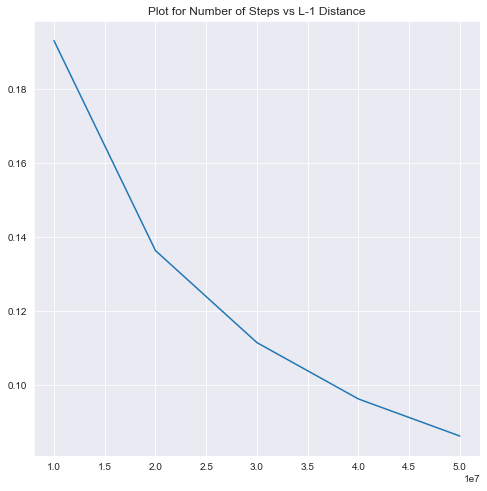

In [4]:
plt.figure(figsize=(8,8));
sns.lineplot(x=M,y=results);
plt.title('Plot for Number of Steps vs L-1 Distance');

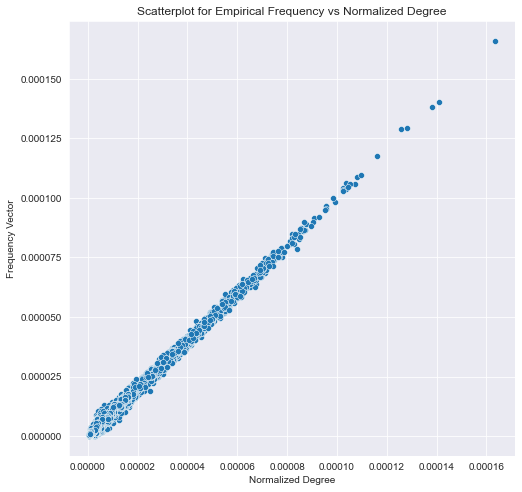

In [5]:
plt.figure(figsize=(8,8));
plot=sns.scatterplot(x=vec_n,y=vec_f);
plot.set_xlabel('Normalized Degree');
plot.set_ylabel('Frequency Vector');
plt.title('Scatterplot for Empirical Frequency vs Normalized Degree');
plt.show()

### Findings:


1) As the number of Random steps increase, the $l1-distance$ decreases.

2) As M changes, the L1-distance is dependent on frequency vector rather than normalized degree as the normalized degree remains fixed.

3) Given that normalized degree would be fixed, $l1-distance$ is decreasing. This is because if we increase $M$ by $1$, frequency vector will increase for the node that is being visited but it will decrease for the rest of the nodes. With each one additional step, this will continue.

4) Let's say we take one additional step and visit $node_{i}$, if before visitation, $n > f$ for $node_{i}$, the $l1-distance$ for $node_{i}$ after visitation will decrease. However, if before visitation, $n < f$ for $node_{i}$, the $l1-distance$ for $node_{i}$ after visitation will increase.

5) Using the scatterplot, we can clearly see a positive linear relationship between normalized degree $n$ and frequency vector $f$.

6) The relationship can intuitively explained, if a node has more neighbours causing higher value of normalized vector, there is a greater chance for this node to have visitation hence a positive relationship can be seen between $n$ and $f$.